# A Recommendation Engine for The Recipes by Using Collaborative Filtering in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
interaction = pd.read_csv('interactions_train.csv')
recipes = pd.read_csv('RAW_recipes.csv')

In [3]:
interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698901 entries, 0 to 698900
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    698901 non-null  int64  
 1   recipe_id  698901 non-null  int64  
 2   date       698901 non-null  object 
 3   rating     698901 non-null  float64
 4   u          698901 non-null  int64  
 5   i          698901 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 32.0+ MB


In [4]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


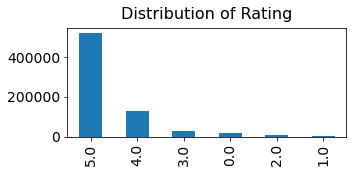

In [5]:
interaction.rating.value_counts().plot(kind = 'bar', fontsize = 14, figsize = (5,2)).set_title('Distribution of Rating', fontsize = 16, ha = 'center', va = 'bottom')
plt.show()

## Clean up the data

In [6]:
all = interaction.drop(['date', 'u', 'i'], axis = 1)
all

,user_id,recipe_id,rating
0,2046,4684,5.0
1,2046,517,5.0
2,1773,7435,5.0
3,1773,278,4.0
4,2046,3431,5.0
...,...,...,...
698896,926904,457971,5.0
698897,2002312797,27208,5.0
698898,1290903,131607,5.0
698899,226867,363072,5.0


In [7]:
grouped_1 = all.groupby(['user_id'], as_index = False, sort = False).agg({'recipe_id':'count'}).reset_index(drop = True)
grouped_1 = grouped_1.rename(columns = {'recipe_id':'reviews_count'})
grouped_1 = grouped_1.sort_values('reviews_count', ascending = False).iloc[:7500,:]
grouped_1

,user_id,reviews_count
9980,424680,6437
575,37449,4581
9338,383346,3656
4264,169430,3465
3146,128473,3338
...,...,...
8361,308507,13
2096,71854,13
10093,99254,13
5853,228313,13


In [8]:
grouped_2 = all.groupby(['recipe_id'], as_index = False, sort = False).agg({'user_id':'count'}).reset_index(drop = True)
grouped_2 = grouped_2.rename(columns = {'user_id':'reviews_count'})
grouped_2 = grouped_2.sort_values('reviews_count', ascending = False).iloc[:7500,:]
grouped_2

,recipe_id,reviews_count
2669,27208,1091
21058,89204,1075
3620,32204,897
5995,39087,894
18739,69173,787
...,...,...
63326,214917,14
48452,160457,14
20168,83642,14
42123,19766,14


In [9]:
part = pd.merge(all.merge(grouped_1).drop(['reviews_count'], axis = 1), grouped_2).drop(['reviews_count'], axis = 1)
part

,user_id,recipe_id,rating
0,2312,2886,5.0
1,11044,2886,5.0
2,9869,2886,5.0
3,22655,2886,3.0
4,26313,2886,4.0
...,...,...,...
222248,2198132,518229,5.0
222249,2209000,518229,5.0
222250,2200124,518229,5.0
222251,2192609,518229,5.0


In [10]:
print('unique users:',len(part.user_id.unique()))
print('unique recipes:',len(part.recipe_id.unique()))

unique users: 7481
unique recipes: 7500


In [11]:
grouped_user = part.groupby(['user_id'], as_index = False, sort = False).agg({'recipe_id':'count'}).reset_index(drop = True)
grouped_user = grouped_user.rename(columns = {'recipe_id':'reviews_count'})

display(grouped_user[['reviews_count']].describe())

,reviews_count
count,7481.000000
mean,29.708996
std,49.227948
min,1.000000
25%,9.000000
50%,15.000000
75%,30.000000
max,1366.000000


In [12]:
grouped_recipe = part.groupby(['recipe_id'], as_index = False, sort = False).agg({'user_id':'count'}).reset_index(drop = True)
grouped_recipe = grouped_recipe.rename(columns = {'user_id':'reviews_count'})

display(grouped_recipe[['reviews_count']].describe())

,reviews_count
count,7500.000000
mean,29.633733
std,36.224671
min,5.000000
25%,15.000000
50%,19.000000
75%,30.000000
max,708.000000


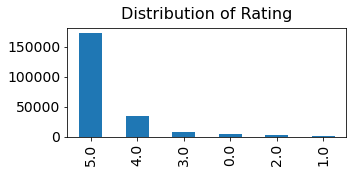

In [13]:
part.rating.value_counts().plot(kind = 'bar', fontsize = 14, figsize = (5,2)).set_title('Distribution of Rating', fontsize = 16, ha = 'center', va = 'bottom')

plt.show()

In [14]:
new_userID = dict(zip(list(part['user_id'].unique()), list(range(len(part['user_id'].unique())))))
display(new_userID)

{2312: 0,
 11044: 1,
 9869: 2,
 22655: 3,
 26313: 4,
 25455: 5,
 25792: 6,
 10033: 7,
 8688: 8,
 28397: 9,
 29014: 10,
 30209: 11,
 29063: 12,
 42058: 13,
 43505: 14,
 32772: 15,
 60989: 16,
 55589: 17,
 64583: 18,
 30228: 19,
 76074: 20,
 85714: 21,
 88717: 22,
 96436: 23,
 93997: 24,
 25941: 25,
 101376: 26,
 59588: 27,
 98919: 28,
 92641: 29,
 111347: 30,
 91584: 31,
 126104: 32,
 60716: 33,
 135887: 34,
 121852: 35,
 122175: 36,
 144671: 37,
 148715: 38,
 130513: 39,
 140806: 40,
 155675: 41,
 155595: 42,
 142386: 43,
 162086: 44,
 163601: 45,
 172369: 46,
 168087: 47,
 162725: 48,
 184081: 49,
 188119: 50,
 189475: 51,
 99221: 52,
 186979: 53,
 194611: 54,
 203111: 55,
 201064: 56,
 207375: 57,
 207176: 58,
 215350: 59,
 218535: 60,
 217226: 61,
 215260: 62,
 227039: 63,
 224088: 64,
 124268: 65,
 143721: 66,
 235074: 67,
 203741: 68,
 257993: 69,
 259154: 70,
 145130: 71,
 246482: 72,
 269891: 73,
 297557: 74,
 272300: 75,
 302961: 76,
 267665: 77,
 307059: 78,
 315635: 79,
 2582

In [15]:
new_recipeID = dict(zip(list(part['recipe_id'].unique()), list(range(len(part['recipe_id'].unique())))))
display(new_recipeID)

{2886: 0,
 3368: 1,
 11020: 2,
 9254: 3,
 13619: 4,
 15364: 5,
 15654: 6,
 14337: 7,
 18513: 8,
 20492: 9,
 16698: 10,
 33454: 11,
 37490: 12,
 31639: 13,
 18487: 14,
 45539: 15,
 35779: 16,
 35547: 17,
 52840: 18,
 61718: 19,
 19901: 20,
 75817: 21,
 14359: 22,
 39911: 23,
 86868: 24,
 65131: 25,
 106251: 26,
 109283: 27,
 21761: 28,
 132411: 29,
 109006: 30,
 202935: 31,
 239592: 32,
 200008: 33,
 5478: 34,
 55680: 35,
 24709: 36,
 79462: 37,
 17300: 38,
 55394: 39,
 53767: 40,
 83287: 41,
 51235: 42,
 37638: 43,
 118475: 44,
 30018: 45,
 70224: 46,
 63750: 47,
 57033: 48,
 90822: 49,
 213535: 50,
 2713: 51,
 17222: 52,
 3400: 53,
 19596: 54,
 24685: 55,
 4368: 56,
 40621: 57,
 8599: 58,
 12668: 59,
 29184: 60,
 18651: 61,
 18829: 62,
 23116: 63,
 19590: 64,
 23195: 65,
 25254: 66,
 11489: 67,
 33386: 68,
 30864: 69,
 21256: 70,
 50342: 71,
 37037: 72,
 37199: 73,
 51919: 74,
 67777: 75,
 45940: 76,
 30644: 77,
 38305: 78,
 27809: 79,
 59183: 80,
 47413: 81,
 29493: 82,
 46597: 83,
 

In [16]:
df = part.replace({'user_id': new_userID, 'recipe_id': new_recipeID})
df

,user_id,recipe_id,rating
0,0,0,5.0
1,1,0,5.0
2,2,0,5.0
3,3,0,3.0
4,4,0,4.0
...,...,...,...
222248,7465,7499,5.0
222249,7475,7499,5.0
222250,7469,7499,5.0
222251,7472,7499,5.0


In [17]:
print('The recipes without names: ', recipes['id'][recipes['name'].isnull()].values[0])
display(df[df['recipe_id'] == recipes['id'][recipes['name'].isnull()].values[0]])

The recipes without names:  368257


,user_id,recipe_id,rating


In [18]:
recipes = recipes[['name', 'id', 'ingredients']].merge(part[['recipe_id']], left_on = 'id', right_on = 'recipe_id', how = 'right').drop(['id'], axis = 1).drop_duplicates().reset_index(drop = True)
recipes

,name,ingredients,recipe_id
0,best banana bread,"['butter', 'granulated sugar', 'eggs', 'banana...",2886
1,blackberry pie iii,"['sugar', 'all-purpose flour', 'cornstarch', '...",3368
2,casablanca chicken,"['boneless skinless chicken breasts', 'olive o...",11020
3,grilled salmon,"['fresh salmon', 'butter', 'garlic', 'salt', '...",9254
4,homemade pie crust,"['all-purpose flour', 'salt', 'butter', 'cold ...",13619
...,...,...,...
7495,cheesy potato italian sausage balls 5fix,['simply potatoes traditional mashed potatoes'...,496573
7496,cheddar stuffed potato cake and egg 5fix,"['olive oil', 'simply potatoes traditional mas...",497382
7497,quick and easy crabby caesar salads 5fix,"['complete caesar salad in a bag', 'simply pot...",497261
7498,mac n cheese and spinach strata sp5,"['simply macaroni & cheese', 'frozen spinach',...",514423


In [19]:
print('unique users:',len(part.user_id.unique()))
print('unique recipes:',len(part.recipe_id.unique()))

unique users: 7481
unique recipes: 7500


In [20]:
mean = df.groupby(['user_id'], as_index = False, sort = False).mean().rename(columns = {'rating':'rating_mean'})
df = df.merge(mean[['user_id','rating_mean']], how = 'left')
df.insert(2, 'rating_adjusted', df['rating'] - df['rating_mean'])
df

,user_id,recipe_id,rating_adjusted,rating,rating_mean
0,0,0,0.382353,5.0,4.617647
1,1,0,0.304348,5.0,4.695652
2,2,0,0.088319,5.0,4.911681
3,3,0,-1.031250,3.0,4.031250
4,4,0,-0.692308,4.0,4.692308
...,...,...,...,...,...
222248,7465,7499,0.588235,5.0,4.411765
222249,7475,7499,0.000000,5.0,5.000000
222250,7469,7499,0.357143,5.0,4.642857
222251,7472,7499,0.384615,5.0,4.615385


In [21]:
train_data, test_data = train_test_split(df, test_size = 0.25)
display(train_data)
display(test_data)

,user_id,recipe_id,rating_adjusted,rating,rating_mean
193522,862,5861,0.248062,5.0,4.751938
46216,332,898,0.992188,5.0,4.007812
211540,4870,6826,0.000000,5.0,5.000000
149517,583,3995,-0.894737,4.0,4.894737
91959,1324,2094,0.296610,5.0,4.703390
...,...,...,...,...,...
29469,6171,497,0.545455,5.0,4.454545
99668,2737,2320,0.125000,5.0,4.875000
174686,751,4996,-4.895775,0.0,4.895775
133195,327,3406,0.080000,5.0,4.920000


,user_id,recipe_id,rating_adjusted,rating,rating_mean
112044,2943,2746,0.550000,5.0,4.450000
123831,1519,3127,-0.503597,4.0,4.503597
183675,2120,5399,0.375000,5.0,4.625000
167168,2518,4665,0.269231,5.0,4.730769
36869,1487,601,-0.680000,4.0,4.680000
...,...,...,...,...,...
3678,1522,90,-0.064516,4.0,4.064516
57652,3709,1245,0.046053,5.0,4.953947
98593,397,2280,0.206897,5.0,4.793103
190812,282,5736,-1.609589,3.0,4.609589


In [22]:
n_users = df.user_id.unique()
n_items = df.recipe_id.unique()

train_data_matrix = np.zeros((n_users.shape[0], n_items.shape[0]))
for row in train_data.itertuples():
    train_data_matrix[row[1]-1, row[2]-1] = row[3]

display(train_data_matrix.shape)
display(train_data_matrix)

(7481, 7500)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.30434783],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.08831909],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.        , 0.        , ..., 0.        , 0.        ,
        0.38235294]])

In [23]:
test_data_matrix = np.zeros((n_users.shape[0], n_items.shape[0]))
for row in test_data.itertuples():
    test_data_matrix[row[1]-1, row[2]-1] = row[3]

display(test_data_matrix.shape)
display(test_data_matrix)

(7481, 7500)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.03125   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.38235294,  0.38235294, ...,  0.        ,
         0.        ,  0.        ]])

## Centered cosine similarity

In [24]:
user_similarity = 1 - pairwise_distances(train_data_matrix, metric = 'cosine')

display(user_similarity.shape)
display(user_similarity)

(7481, 7481)

array([[ 1.        ,  0.00130413,  0.        , ...,  0.        ,
         0.        ,  0.00428293],
       [ 0.00130413,  1.        , -0.02340345, ...,  0.        ,
         0.        ,  0.00146055],
       [ 0.        , -0.02340345,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.00428293,  0.00146055,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [25]:
item_similarity = 1 - pairwise_distances(train_data_matrix.T, metric = 'cosine')

display(item_similarity.shape)
display(item_similarity)

(7500, 7500)

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.00329218],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.01233105],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.00329218, -0.01233105,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

## Predict the ratings

In [26]:
def predict(ratings, similarity, _type = 'user'):
    if _type == 'user':
        pred = similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis = np.newaxis)])
    
    elif _type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis = 1)]) 
    
    return pred

In [27]:
user_pred = predict(train_data_matrix, user_similarity, _type = 'user')

display(user_pred.shape)
display(user_pred)

(7481, 7500)

array([[-1.31809256e-11,  2.65196129e-09,  4.36621527e-10, ...,
         0.00000000e+00,  0.00000000e+00,  1.05787116e-05],
       [ 4.55318376e-09,  1.78462814e-07,  2.29701091e-07, ...,
         0.00000000e+00,  0.00000000e+00,  3.73768702e-06],
       [-2.96946860e-07,  3.79934047e-08,  1.30015105e-07, ...,
         0.00000000e+00,  0.00000000e+00, -1.28768870e-08],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.50796096e-06, -9.10313415e-08,  1.18884698e-07, ...,
         0.00000000e+00,  0.00000000e+00,  1.14864230e-05]])

In [28]:
user_pred_df = pd.DataFrame(user_pred, columns = list(n_items))
user_pred_df.insert(0, 'user_id', list(n_users))

user_pred_df

,user_id,0,1,2,3,4,5,6,7,8,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0,-1.318093e-11,2.651961e-09,4.366215e-10,-1.470217e-08,3.183566e-08,-1.327855e-08,8.021019e-08,2.824571e-08,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.057871e-05
1,1,4.553184e-09,1.784628e-07,2.297011e-07,-1.593069e-08,2.853653e-08,-1.182460e-07,-1.704346e-06,7.500399e-08,-3.431115e-09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,3.737687e-06
2,2,-2.969469e-07,3.799340e-08,1.300151e-07,1.166812e-07,7.472235e-08,6.996057e-08,4.056443e-07,2.922263e-09,8.783379e-10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,-1.287689e-08
3,3,1.397607e-07,2.628001e-08,6.099883e-08,-1.030685e-07,-2.974885e-07,-2.692682e-08,-3.945032e-07,-7.101733e-08,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,-3.357876e-05
4,4,-4.537516e-07,3.947760e-08,-1.117642e-07,3.948899e-08,-1.861074e-07,-1.466373e-07,3.565394e-07,3.638700e-08,-1.837061e-08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,7.124462e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,7476,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7477,7477,0.000000e+00,0.000000e+00,6.417185e-10,0.000000e+00,0.000000e+00,-2.948861e-08,1.340004e-06,0.000000e+00,0.000000e+00,...,0.000008,0.000009,0.000007,0.000003,0.000012,0.00001,-9.621395e-07,-8.362777e-09,1.946697e-07,0.000000e+00
7478,7478,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7479,7479,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [29]:
item_pred = predict(train_data_matrix, item_similarity, _type = 'item')

display(item_pred.shape)
display(item_pred)

(7481, 7500)

array([[-9.60451639e-05,  6.88147915e-05, -1.30713672e-04, ...,
         0.00000000e+00,  0.00000000e+00,  1.46480089e-02],
       [-1.78884452e-03,  4.58142681e-03,  1.63866849e-03, ...,
         0.00000000e+00,  0.00000000e+00,  6.00557941e-03],
       [-3.76369417e-05,  1.57380735e-03,  4.56721195e-03, ...,
         0.00000000e+00,  0.00000000e+00,  3.85473752e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.20911132e-02, -3.28126961e-03,  1.11395003e-03, ...,
         0.00000000e+00,  0.00000000e+00,  2.11527729e-02]])

In [30]:
item_pred_df = pd.DataFrame(item_pred, columns = list(n_items))
item_pred_df.insert(0, 'user_id', list(n_users))

item_pred_df

,user_id,0,1,2,3,4,5,6,7,8,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0,-0.000096,0.000069,-1.307137e-04,-0.000820,0.000240,0.000309,-0.000057,0.000270,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014648
1,1,-0.001789,0.004581,1.638668e-03,-0.000524,0.000374,-0.001470,-0.002505,0.001569,-0.000441,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006006
2,2,-0.000038,0.001574,4.567212e-03,0.001188,0.001224,0.002105,-0.002463,0.000135,0.000017,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000385
3,3,-0.004529,0.000267,-3.045492e-04,-0.000167,-0.002134,0.000496,-0.000871,-0.001355,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.026010
4,4,-0.008099,0.001189,-1.345000e-04,-0.000477,0.000585,0.000412,0.003112,0.003129,-0.011691,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,7476,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7477,7477,0.000000,0.000000,8.932723e-07,0.000000,0.000000,-0.000068,0.000519,0.000000,0.000000,...,0.01825,0.067177,0.058822,0.032322,0.034072,0.098576,0.001882,-0.010697,-0.002334,0.000000
7478,7478,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7479,7479,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Evaluation of the predictions

In [31]:
def RMSE(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    
    return sqrt(mean_squared_error(prediction, ground_truth))

In [32]:
user_RMSE = RMSE(user_pred, test_data_matrix)
item_RMSE = RMSE(item_pred, test_data_matrix)

print('user_RMSE = {}'.format(user_RMSE))
print('item_RMSE = {}'.format(item_RMSE))

user_RMSE = 0.8460853108211888
item_RMSE = 0.846035035805818


## The recommendation engine

In [35]:
def getRecommendations_UserBased(user_id, top_n = 10):
    for old_user, new_user in new_userID.items():
        if user_id == new_user:
            print(f'Top {top_n} Recommended Recipes for Original User ID: {old_user}\n')
    
    rated = list(df['recipe_id'].loc[df['user_id'] == user_id])
    _all = user_pred_df.loc[user_pred_df['user_id'] == user_id].copy()
    _all.drop(user_pred_df[rated], axis = 1, inplace = True)
    _sorted = _all.iloc[:,1:].sort_values(by = _all.index[0], axis = 1, ascending = False)
    dict_top_n = _sorted.iloc[:, :top_n].to_dict(orient = 'records')

    i = 1
    for recipe_id in list(dict_top_n[0].keys()):
        for old_recipe, new_recipe in new_recipeID.items():
            if recipe_id == new_recipe:
                name = recipes[recipes['recipe_id'] == old_recipe]['name'].values[0]
                ingredients = recipes[recipes['recipe_id'] == old_recipe]['ingredients'].values[0]

                print(f'Top {i} Original Recipe ID: {old_recipe} - {name}\n Ingredients: {ingredients}\n')
                
                i += 1
                
    return dict_top_n[0]

def getRecommendations_ItemBased(user_id, top_n = 10):
    for old_user, new_user in new_userID.items():
        if user_id == new_user:
            print(f'Top {top_n} Recommended Recipes for Original User ID: {old_user}\n')
    
    rated = list(df['recipe_id'].loc[df['user_id'] == user_id])
    _all = item_pred_df.loc[item_pred_df['user_id'] == user_id].copy()
    _all.drop(user_pred_df[rated], axis = 1, inplace = True)
    _sorted = _all.iloc[:,1:].sort_values(by = _all.index[0], axis = 1, ascending = False)
    dict_top_n = _sorted.iloc[:, :top_n].to_dict(orient = 'records')

    i = 1
    for recipe_id in list(dict_top_n[0].keys()):
        for old_recipe, new_recipe in new_recipeID.items():
            if recipe_id == new_recipe:
                name = recipes[recipes['recipe_id'] == old_recipe]['name'].values[0]
                ingredients = recipes[recipes['recipe_id'] == old_recipe]['ingredients'].values[0]

                print(f'Top {i} Original Recipe ID: {old_recipe} - {name}\n Ingredients: {ingredients}\n')
                
                i += 1
                
    return dict_top_n[0]

In [36]:
R1_UserBased = getRecommendations_UserBased(702)
R1_UserBased

Top 10 Recommended Recipes for Original User ID: 318028

Top 1 Original Recipe ID: 37494 - savory pork chops
 Ingredients: ['all-purpose flour', 'ground mustard', 'seasoning salt', 'pepper', 'pork chops', 'vegetable oil', 'water', 'onion', 'ketchup', 'orange marmalade', 'soy sauce', 'dijon mustard']

Top 2 Original Recipe ID: 34713 - awesome  and economical  chai concentrate
 Ingredients: ['ground cardamom', 'ground ginger', 'cinnamon', 'ground cloves', 'ground nutmeg', 'condensed milk', 'strong black tea']

Top 3 Original Recipe ID: 106826 - breakfast in a pan frittata
 Ingredients: ['olive oil', 'red skin white potato', 'red bell pepper', 'green onions', 'sliced mushrooms', 'canadian bacon', 'egg substitute', 'milk', 'mozzarella cheese', 'salt and pepper']

Top 4 Original Recipe ID: 55600 - leg of lamb in the crock pot
 Ingredients: ['leg of lamb', 'soy sauce', 'garlic cloves', 'onion soup mix', 'water', 'sweet onion']

Top 5 Original Recipe ID: 14005 - best raw broccoli salad
 Ingre

{87: 3.812833564900948e-05,
 2637: 8.77288635937538e-06,
 1154: 6.66234942173245e-06,
 770: 6.467264169722576e-06,
 711: 4.762595052954596e-06,
 1589: 4.596615236592317e-06,
 5601: 4.57740245909269e-06,
 375: 4.388152239114517e-06,
 2101: 3.532902212984488e-06,
 1163: 3.218474531404285e-06}

In [37]:
R1_ItemBased = getRecommendations_ItemBased(702)
R1_ItemBased

Top 10 Recommended Recipes for Original User ID: 318028

Top 1 Original Recipe ID: 33995 - vegan truffles
 Ingredients: ['raw cashews', 'water', 'bittersweet chocolate', 'cocoa powder']

Top 2 Original Recipe ID: 34713 - awesome  and economical  chai concentrate
 Ingredients: ['ground cardamom', 'ground ginger', 'cinnamon', 'ground cloves', 'ground nutmeg', 'condensed milk', 'strong black tea']

Top 3 Original Recipe ID: 55600 - leg of lamb in the crock pot
 Ingredients: ['leg of lamb', 'soy sauce', 'garlic cloves', 'onion soup mix', 'water', 'sweet onion']

Top 4 Original Recipe ID: 63787 - fairest wheels  chicken pinwheels
 Ingredients: ['cooked chicken', 'lettuce', 'reduced-fat sharp cheddar cheese', 'green onion', 'red bell pepper', 'light cream cheese', 'low-fat sour cream', 'red pepper jelly', 'flour tortillas']

Top 5 Original Recipe ID: 87860 - roasted asparagus with balsamic brown butter sauce
 Ingredients: ['asparagus spears', 'olive oil', 'salt', 'black pepper', 'unsalted bu

{5698: 0.1810865462190404,
 2637: 0.06950394925317667,
 770: 0.035070574181782284,
 1163: 0.03394455194170618,
 5357: 0.024530641371369295,
 1589: 0.023264375788620707,
 5138: 0.02015356308744026,
 673: 0.019006070392929526,
 548: 0.018510718835920318,
 3486: 0.01820662182177312}

In [38]:
R2_UserBased = getRecommendations_UserBased(408, 5)
R2_UserBased

Top 5 Recommended Recipes for Original User ID: 52543

Top 1 Original Recipe ID: 34587 - chicken taco rice
 Ingredients: ['boneless chicken', 'oil', 'water', 'tomato sauce', 'taco seasoning mix', 'frozen sweet corn', 'red bell pepper', 'minute rice', 'cheddar cheese']

Top 2 Original Recipe ID: 30505 - baked cherry tomatoes with parmesan topping
 Ingredients: ['extra virgin olive oil', 'cherry tomatoes', 'salt', 'ground black pepper', 'fresh parsley', 'parmesan cheese']

Top 3 Original Recipe ID: 18110 - winner s spaghetti casserole
 Ingredients: ['thin spaghetti', 'spaghetti sauce', 'lean ground beef', 'onion', 'green bell pepper', 'cream cheese', 'butter', 'parmesan cheese']

Top 4 Original Recipe ID: 55244 - kick a   fried onion rings
 Ingredients: ['buttermilk', 'tabasco sauce', 'old bay seasoning', 'sugar', 'flour', 'cornmeal', 'baking powder', 'pepper', 'salt', 'sweet onions', 'vegetable oil']

Top 5 Original Recipe ID: 70087 - cheddar potato beer soup with shredded ham
 Ingredie

{2870: 4.063719707825603e-05,
 729: 2.042481640316793e-05,
 1404: 1.0838765653031605e-05,
 6365: 7.979699770427167e-06,
 5196: 4.6473330963904485e-06}

In [39]:
R2_ItemBased = getRecommendations_ItemBased(408, 5)
R2_ItemBased

Top 5 Recommended Recipes for Original User ID: 52543

Top 1 Original Recipe ID: 55244 - kick a   fried onion rings
 Ingredients: ['buttermilk', 'tabasco sauce', 'old bay seasoning', 'sugar', 'flour', 'cornmeal', 'baking powder', 'pepper', 'salt', 'sweet onions', 'vegetable oil']

Top 2 Original Recipe ID: 65840 - garlic  rosemary and parmesan au gratin potatoes
 Ingredients: ['butter', 'flour', 'milk', 'fresh rosemary', 'garlic', 'salt', 'black pepper', 'potatoes', 'parmesan cheese']

Top 3 Original Recipe ID: 385071 - 5 minute individual potato gratins by melissa d arabian
 Ingredients: ['pam cooking spray', 'russet potatoes', 'swiss cheese', 'green onions', 'salt & freshly ground black pepper', 'heavy cream']

Top 4 Original Recipe ID: 346966 - sara s hawaiian pizza
 Ingredients: ['pizza crust', 'pizza sauce', 'ham', 'onion', 'crushed pineapple', 'tasty cheese', 'mozzarella cheese', 'parmesan cheese']

Top 5 Original Recipe ID: 10785 - super spaghetti squash with spaghetti sauce
 In

{6365: 0.007129804302764819,
 1140: 0.004983065282809674,
 4137: 0.004451802223683212,
 6364: 0.003911246003550675,
 3635: 0.003739024314243364}

In [40]:
R3_UserBased = getRecommendations_UserBased(204, 7)
R3_UserBased

Top 7 Recommended Recipes for Original User ID: 68503

Top 1 Original Recipe ID: 930 - my favorite baked beans
 Ingredients: ['bacon', 'drippings', 'onion', 'pork and beans in tomato sauce', 'brown sugar', 'catsup', 'worcestershire sauce', 'prepared mustard']

Top 2 Original Recipe ID: 106611 - cauliflower cheddar soup
 Ingredients: ['water', 'potatoes', 'cauliflower', 'onion', 'carrot', 'garlic cloves', 'shredded cheddar cheese', 'salt', 'dill', 'dry mustard', 'white pepper', 'milk']

Top 3 Original Recipe ID: 42071 - best cream of broccoli soup
 Ingredients: ['butter', 'onion', 'garlic clove', 'celery', 'chicken broth', 'broccoli', 'flour', 'milk', 'pepper', 'velveeta cheese']

Top 4 Original Recipe ID: 129996 - tangy pan fried tilapia
 Ingredients: ['tilapia fillet', 'panko breadcrumbs', 'dijon mustard', 'olive oil', 'salt and pepper']

Top 5 Original Recipe ID: 46775 - jennifer millar s chocolate budini
 Ingredients: ['bittersweet chocolate', 'unsalted butter', 'sugar', 'fine sea s

{262: 1.2283676179848402e-05,
 451: 9.567421602279347e-06,
 570: 8.417070447916305e-06,
 420: 7.87939365702014e-06,
 2379: 6.575534154354463e-06,
 539: 6.4864106269609975e-06,
 1254: 6.379485008226258e-06}

In [41]:
R3_ItemBased = getRecommendations_ItemBased(204, 7)
R3_ItemBased

Top 7 Recommended Recipes for Original User ID: 68503

Top 1 Original Recipe ID: 104086 - the best chicken tortilla soup
 Ingredients: ['chicken broth', 'tomato sauce', 'diced tomatoes', 'cooked chicken', 'anaheim chilies', 'jalapeno pepper', 'diced onion', 'tomatoes', 'garlic cloves', 'cilantro', 'chili powder', 'cumin', 'pepper', 'salt', 'tabasco sauce', 'chipotle pepper', 'shredded cheddar cheese', 'avocado', 'lime', 'tortilla chips']

Top 2 Original Recipe ID: 72722 - honey roasted squash rings
 Ingredients: ['liquid honey', 'soy sauce', 'garlic', 'salt', 'pepper', 'acorn squash']

Top 3 Original Recipe ID: 102914 - red lobster garlic cheese biscuits
 Ingredients: ['self-rising flour', 'butter flavor crisco', 'cheddar cheese', 'parmesan cheese', 'milk', 'garlic salt', 'dry mustard', 'cayenne pepper', 'butter']

Top 4 Original Recipe ID: 113186 - savory onion potatoes
 Ingredients: ['potatoes', 'lipton onion soup mix', 'extra virgin olive oil', 'parmesan cheese']

Top 5 Original Rec

{2863: 0.40524536325338695,
 2030: 0.38285785142369283,
 6974: 0.34843570529949064,
 6998: 0.3094182238834866,
 3776: 0.29044483805891314,
 4530: 0.29040998195172557,
 4251: 0.28765922949909495}